In [1]:
import pandas as pd
import os
import sys
import numpy as np
import urllib
from __future__ import print_function
import geopandas as gp

import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
%pylab inline
import seaborn as sns

import pylab as pl


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD')

In [3]:
url = "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip"
urllib.request.urlretrieve(url, "mn_mappluto_18v1.zip")
!unzip -d $PUIDATA/munits1/ mn_mappluto_18v1.zip

Archive:  mn_mappluto_18v1.zip
  inflating: /nfshome/vvt221/PUIdata/munits1/PLUTODD18v1.pdf  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.dbf  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.prj  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.sbn  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.sbx  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.shp  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.shp.xml  
  inflating: /nfshome/vvt221/PUIdata/munits1/MN_Dcp_Mappinglot.shx  
  inflating: /nfshome/vvt221/PUIdata/munits1/mn_pluto.dbf  
  inflating: /nfshome/vvt221/PUIdata/munits1/mn_pluto.dbf.xml  
  inflating: /nfshome/vvt221/PUIdata/munits1/MNMapPLUTO.BBL.atx  
  inflating: /nfshome/vvt221/PUIdata/munits1/MNMapPLUTO.CD.atx  
  inflating: /nfshome/vvt221/PUIdata/munits1/MNMapPLUTO.dbf  
  inflating: /nfshome/vvt221/PUIdata/munits1/MNMapPLUTO.LandUse.atx  
  inflating: /nfshome/vvt221/PUI

In [4]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/munits1/MNMapPLUTO.shp")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


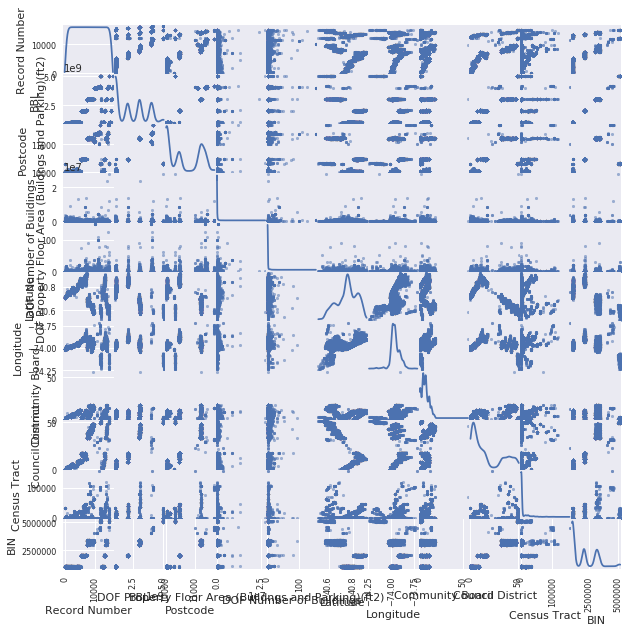

In [5]:
sfig = pd.scatter_matrix(df, s=30, figsize=(10, 10), diagonal='kde')

### FIGURE 1: Scatterplot showing correlations between the variables of the dataset if any

In [6]:
df.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [7]:
df['Site EUI(kBtu/ft2)'] = pd.to_numeric(df['Site EUI(kBtu/ft2)'], errors='coerce')



In [8]:
df['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(df['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')



In [10]:
bsize.columns.sort_values()

Index(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'AssessLand', 'AssessTot',
       'BBL', 'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 'Block',
       'BoroCode', 'Borough', 'BsmtCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010',
       'ComArea', 'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'Easements',
       'ExemptLand', 'ExemptTot', 'Ext', 'FIRM07_FLA', 'FacilFAR',
       'FactryArea', 'FireComp', 'GarageArea', 'HealthArea', 'HealthCent',
       'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea',
       'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PFIRM15_FL', 'PLUTOMapID',
       'PolicePrct', 'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea',
       'SHAPE_area', 'SHAPE_len', 'SPDist1', 'SPDist2', 'SPDist3', 'Sanborn',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'SchoolDist', 'SplitZone',
       'StrgeArea', 'TaxMap', 'Tract201

In [11]:
bsize.shape

(42556, 91)

In [12]:
bsize_req = bsize[['BBL', 'geometry','UnitsTotal', 'UnitsRes', 'YearBuilt', ]]

In [13]:
bsize_req.head()

BBL                                           geometry  \
0  1.015450e+09  POLYGON ((997277.2344360352 221816.0936279297,...   
1  1.007238e+09  POLYGON ((984164.5626220703 211846.0704345703,...   
2  1.016800e+09  POLYGON ((1000742.195800781 227910.6640014648,...   
3  1.013850e+09  POLYGON ((994007.6885986328 219880.4284057617,...   
4  1.011970e+09  POLYGON ((992273.6849975586 224863.4904174805,...   

   UnitsTotal  UnitsRes  YearBuilt  
0          18        16       1920  
1          50        50       1914  
2          10        10       1910  
3          32        29       1928  
4          26        26       1900

In [14]:
df_re = df[['Site EUI(kBtu/ft2)' ,'Reported Property Floor Area (Building(s)) (ft²)',  'BBL']]

In [15]:
bsize.BBL.astype(float)[:10]

0    1.015450e+09
1    1.007238e+09
2    1.016800e+09
3    1.013850e+09
4    1.011970e+09
5    1.002360e+09
6    1.008370e+09
7    1.001960e+09
8    1.022240e+09
9    1.011270e+09
Name: BBL, dtype: float64

In [16]:
df_re['Site EUI(kBtu/ft2)'].astype(float)[:10]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Site EUI(kBtu/ft2), dtype: float64

In [17]:
df_re['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)[:10]

0    918919.0
1         NaN
2     64200.0
3         NaN
4     50000.0
5     61800.0
6    102198.0
7     46620.0
8         NaN
9     54029.0
Name: Reported Property Floor Area (Building(s)) (ft²), dtype: float64

In [18]:
df_re['BBL'].astype(float)[:10]

0    1.000410e+09
1    4.021460e+09
2    2.027620e+09
3    1.006700e+09
4    2.048300e+09
5    2.006120e+09
6    3.050770e+09
7    3.065710e+09
8    4.004490e+09
9    3.072240e+09
Name: BBL, dtype: float64

In [19]:
bsize.UnitsTotal.astype(float)[:10]

0    18.0
1    50.0
2    10.0
3    32.0
4    26.0
5     3.0
6     8.0
7     2.0
8    30.0
9    10.0
Name: UnitsTotal, dtype: float64

In [20]:
bsize.UnitsRes.astype(float)[:10]

0    16.0
1    50.0
2    10.0
3    29.0
4    26.0
5     2.0
6     0.0
7     0.0
8    30.0
9    10.0
Name: UnitsRes, dtype: float64

In [21]:
print ("number of missing energy observations:", np.isnan(df_re['Site EUI(kBtu/ft2)'].astype(float)).sum())

number of missing energy observations: 4623


In [22]:
print ("fraction of missing energy observations: %.2f"%(np.isnan(df_re['Site EUI(kBtu/ft2)'].astype(float)).sum() /
      len(df_re['Site EUI(kBtu/ft2)'])))

fraction of missing energy observations: 0.29


In [23]:
bblnrgdataGPD = bsize_req.merge(df_re,on='BBL')

In [24]:
df_re.head()

Site EUI(kBtu/ft2)  Reported Property Floor Area (Building(s)) (ft²)  \
0                 NaN                                          918919.0   
1                 NaN                                               NaN   
2                 NaN                                           64200.0   
3                 NaN                                               NaN   
4                 NaN                                           50000.0   

            BBL  
0  1.000410e+09  
1  4.021460e+09  
2  2.027620e+09  
3  1.006700e+09  
4  2.048300e+09

In [25]:
bblnrgdataGPD.head()

BBL                                           geometry  \
0  1.007238e+09  POLYGON ((984164.5626220703 211846.0704345703,...   
1  1.013850e+09  POLYGON ((994007.6885986328 219880.4284057617,...   
2  1.021740e+09  POLYGON ((1004080.155029297 252930.9956054688,...   
3  1.008830e+09  POLYGON ((989337.639831543 209686.7838134766, ...   
4  1.008570e+09  POLYGON ((988035.3540039062 210290.9854125977,...   

   UnitsTotal  UnitsRes  YearBuilt  Site EUI(kBtu/ft2)  \
0          50        50       1914                68.7   
1          32        29       1928                87.4   
2          72        72       1923               140.4   
3         108       107       1931                96.5   
4         138       134       1910                36.4   

   Reported Property Floor Area (Building(s)) (ft²)  
0                                           95844.0  
1                                          206989.0  
2                                           52920.0  
3                                           98359.0  
4                                          154000.0

In [26]:
bblnrgdataGPD['logarea'] = np.log(bblnrgdataGPD['Reported Property Floor Area (Building(s)) (ft²)'] + 1) 
bblnrgdataGPD['lognrg'] =  np.log(bblnrgdataGPD['Site EUI(kBtu/ft2)'])


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


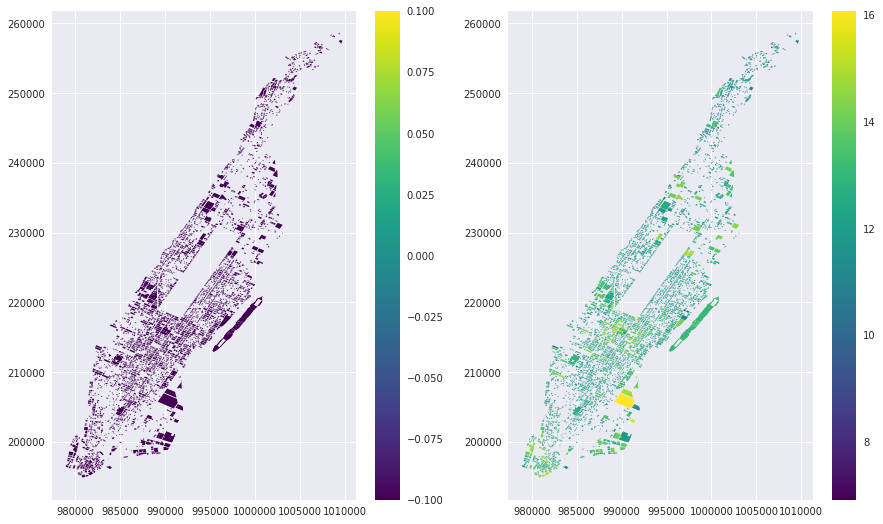

In [27]:
fig = pl.figure(figsize=(15,9))

ax1 = fig.add_subplot(121)
bblnrgdataGPD.dropna().plot(ax=ax1, column='lognrg' , cmap='viridis' , legend =True)


ax2 = fig.add_subplot(122)
bblnrgdataGPD.dropna().plot(ax=ax2, column='logarea' , cmap='viridis' , legend =True)


### Figure 2.1 : choropleth showing the energy consumption of buidings in logarithmic scale
### Figure 2.2: choropleth showing the number of building units in logarithmic scale for manhattan
### Energy consumption appears to be uniformly distributed regardless of the building size

In [28]:
bblnrgdataGPD['totalEnergy'] = bblnrgdataGPD[\
    'Reported Property Floor Area (Building(s)) (ft²)'].astype(float) *\
                bblnrgdataGPD['Site EUI(kBtu/ft2)'].astype(float)

In [29]:
bblnrgdata = pd.DataFrame(bblnrgdataGPD)

In [30]:
bblnrgdata.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


BBL   UnitsTotal     UnitsRes    YearBuilt  \
count  6.438000e+03  6438.000000  6438.000000  6438.000000   
mean   1.012057e+09   109.339546    97.137776  1931.534793   
std    5.667368e+06   250.111307   247.860997   152.294367   
min    1.000010e+09     0.000000     0.000000     0.000000   
25%    1.008190e+09    19.000000     0.000000  1920.000000   
50%    1.012360e+09    59.500000    49.000000  1930.000000   
75%    1.015478e+09   117.000000   107.000000  1965.000000   
max    1.022500e+09  8812.000000  8764.000000  2017.000000   

       Site EUI(kBtu/ft2)  Reported Property Floor Area (Building(s)) (ft²)  \
count        5.047000e+03                                      5.545000e+03   
mean         1.155594e+03                                      2.133406e+05   
std          4.284263e+04                                      3.242996e+05   
min          0.000000e+00                                      0.000000e+00   
25%                   NaN                                               NaN   
50%                   NaN                                               NaN   
75%                   NaN                                               NaN   
max          3.018493e+06                                      9.515627e+06   

           logarea       lognrg   totalEnergy  
count  5545.000000  5047.000000  5.039000e+03  
mean     11.817394         -inf  2.132715e+08  
std       0.860873          NaN  5.260042e+09  
min       0.000000         -inf  0.000000e+00  
25%            NaN          NaN           NaN  
50%            NaN          NaN           NaN  
75%            NaN          NaN           NaN  
max      16.068446    14.920268  3.501452e+11

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Minimum building enerygy value: 5344.0
Maximum building enerygy value: 350145188000.0


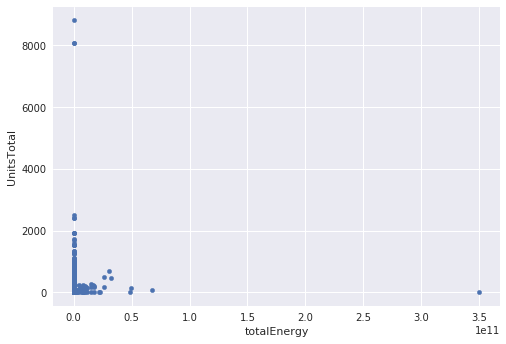

In [31]:
bblnrgdata.plot('totalEnergy', 'UnitsTotal',kind='scatter')


print('Minimum building enerygy value: ' + str(bblnrgdata[bblnrgdata['totalEnergy'] > 0 ]['totalEnergy'].min()) )
print('Maximum building enerygy value: ' + str(bblnrgdata['totalEnergy'].max()) )

### Figure 3: Plot showing the total Units of a building against the total energy consumed . The values are concentrated in the range 0.0 to 0.5 kBtu with the exception of an outlier which might have been incorrectly entered

In [32]:
bblnrgdata['totalEnergy'].describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    5.039000e+03
mean     2.132715e+08
std      5.260042e+09
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      3.501452e+11
Name: totalEnergy, dtype: float64

(0, 500000000.0)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


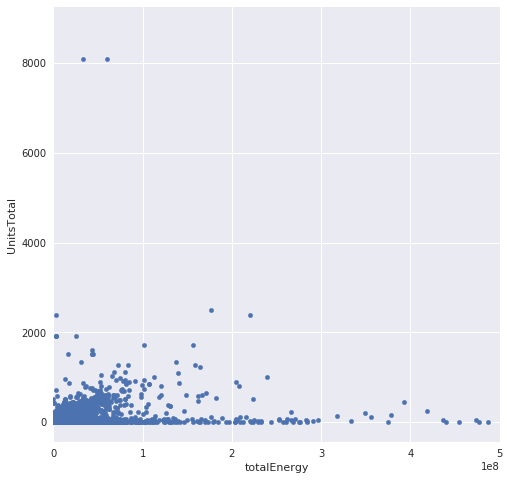

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
bblnrgdata.plot('totalEnergy' ,'UnitsTotal',kind='scatter', ax=ax)
ax.set_xlim(0,0.5e+9)

### Figure 4: Plot showing the zoomed in version of total building units against the total Energy consumed. There appears to be a positive correlation in the increase in total Units as total Energy consumption slightly increases.

### Figure: Total Energy Consumed is lies between 0 and 5 * 10^8 units

### Number of total units lies between 0 and 2000

Energy consumtion seems to steeply increase as number of units increases.


Plot both NRG vs Units total and Units total vs NRG, both in log space

(1, 1000)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


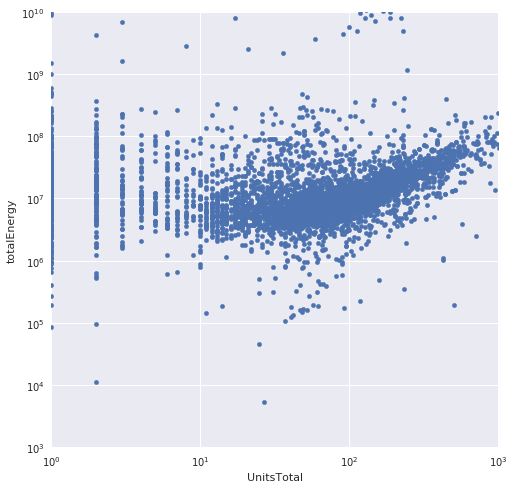

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
bblnrgdata.plot('UnitsTotal','totalEnergy' ,kind='scatter', ax=ax ,loglog=True)
ax.set_ylim(1000,1e10)
ax.set_xlim(1,1000)

### Figure 5: Plot showing the total energy consumed against the total number of units in the building on a logatrithmic scale. There seems to be a positive correlation in the energy consumption against the total number of units.

(1, 1000)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


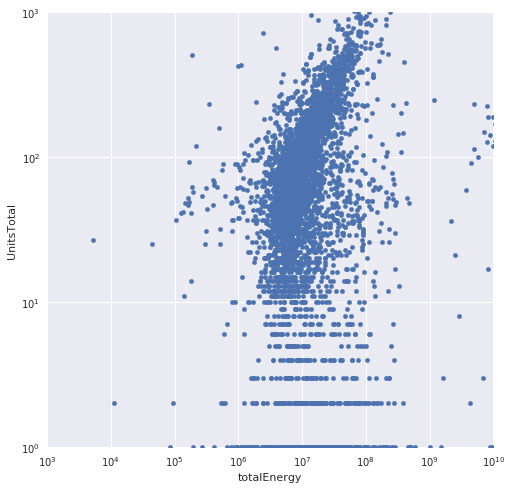

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
bblnrgdata.plot('totalEnergy' ,'UnitsTotal',kind='scatter', ax=ax ,loglog=True)
ax.set_xlim(1000,1e10)
ax.set_ylim(1,1000)

### Figure 6: Plot showing the total energy consumed against the total number of units in the building on a logatrithmic scale. There is a steep increse in the log number of building as log totalEnergy increases from 10^6 to 10^8

## Fit the data with a line in log space

In [36]:
bblnrgdataCut  = bblnrgdata[(bblnrgdata['totalEnergy'] >1000) & (bblnrgdata['totalEnergy'] < 1e10) & (bblnrgdata['UnitsTotal'] < 1000) & (bblnrgdata['UnitsTotal'] > 1)]



In [37]:
bblnrgdataCut['logEnergy'] = np.log(bblnrgdataCut['totalEnergy'])
bblnrgdataCut['logUnits'] = np.log(bblnrgdataCut['UnitsTotal'])



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
bblnrgdataCut['logUnits2'] = bblnrgdataCut['logUnits'] **2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
bblnrgdataCut['logEnergy10'] = np.log10(bblnrgdataCut['totalEnergy'])
bblnrgdataCut['logUnits10'] = np.log10(bblnrgdataCut['UnitsTotal'])


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
bblnrgdataCut.sort_values(by='logUnits10' , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
OLS1 = smf.ols(formula='logEnergy ~ logUnits ', data=bblnrgdataCut).fit()
OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logEnergy   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           5.57e-58
Time:                        23:37:53   Log-Likelihood:                -6711.1
No. Observations:                4624   AIC:                         1.343e+04
Df Residuals:                    4622   BIC:                         1.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.3414      0.055    280.699      0.000        15.234    15.449
logUnits       0.2078      0.013     16.279      0.000         0.183     0.233
==============================================================================
Omnibus:                     1304.227   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12405.006
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                      10.734   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'logEnergy')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


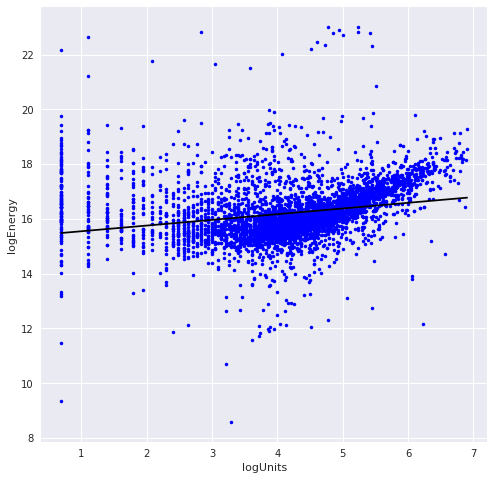

In [43]:
#fig, ax = plt.subplots(figsize=(8,8))
pl.figure(figsize=(8,8))

pl.plot(bblnrgdataCut['logUnits'] ,bblnrgdataCut['logEnergy'] ,'b.')
pl.plot(bblnrgdataCut['logUnits'],OLS1.predict(bblnrgdataCut), 'k')
pl.xlabel('logUnits')
pl.ylabel('logEnergy')

### Figure 7: Plot showing the total energy consumed against the total number of units in the building on a logatrithmic scale. A linear model has been fitted to the plot .

In [44]:
OLS2 = smf.ols(formula='logUnits ~ logEnergy ', data=bblnrgdataCut).fit()
OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logUnits   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           5.57e-58
Time:                        23:37:56   Log-Likelihood:                -7237.4
No. Observations:                4624   AIC:                         1.448e+04
Df Residuals:                    4622   BIC:                         1.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1136      0.260     -0.437      0.662        -0.624     0.396
logEnergy      0.2609      0.016     16.279      0.000         0.230     0.292
==============================================================================
Omnibus:                      808.458   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.999
Skew:                          -1.119   Prob(JB):                    6.06e-310
Kurtosis:                       4.544   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'logEnergy')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


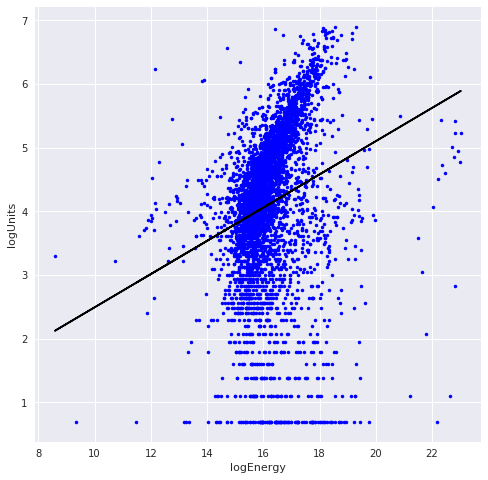

In [45]:
pl.figure(figsize=(8,8))

pl.plot(bblnrgdataCut['logEnergy'] ,bblnrgdataCut['logUnits'] ,'b.')
pl.plot(bblnrgdataCut['logEnergy'],OLS2.predict(bblnrgdataCut), 'k')
#ax.set_ylim(1000,1e10)
#ax.set_xlim(1,1000)
pl.ylabel('logUnits')
pl.xlabel('logEnergy')

### Figure 8: Plot showing the total number of units in the building against  the total energy consumed on a logatrithmic scale. A linear model has been fitted to the plot .

### Plotting the linear models

In [46]:
bblnrgdataCut.sort_values(by=['totalEnergy'],ascending=False)

BBL                                           geometry  \
3266  1.011560e+09  POLYGON ((987784.8519897461 221642.0620117188,...   
2363  1.014130e+09  POLYGON ((995965.4625854492 221260.1127929688,...   
4938  1.009210e+09  POLYGON ((988852.9102172852 206149.5170288086,...   
231   1.008960e+09  POLYGON ((988204.2828369141 206506.1140136719,...   
4021  1.010120e+09  POLYGON ((987394.6804199219 214634.1265869141,...   
5058  1.000538e+09  POLYGON ((980530.1426391602 197664.8245849609,...   
4696  1.013508e+09  POLYGON ((994487.1734008789 215740.9891967773,...   
1561  1.014270e+09  POLYGON ((995528.7042236328 219689.1915893555,...   
6240  1.001760e+09  POLYGON ((982548.2678222656 200659.4302368164,...   
317   1.013450e+09  POLYGON ((993702.6508178711 214640.8237915039,...   
6431  1.008498e+09  POLYGON ((987666.3580322266 208396.2644042969,...   
890   1.013128e+09  POLYGON ((992716.3308105469 216842.5222167969,...   
2966  1.001358e+09  POLYGON ((982428.0172119141 199419.8483886719,...   
3071  1.000400e+09  POLYGON ((981834.8070068359 196752.5231933594,...   
3622  1.013490e+09  POLYGON ((994271.9046020508 215633.831237793, ...   
5143  1.010220e+09  POLYGON ((988930.7348022461 216741.807434082, ...   
3156  1.010150e+09  POLYGON ((987729.1633911133 215383.6716308594,...   
2582  1.008978e+09  POLYGON ((988271.1466064453 206972.8547973633,...   
4247  1.005350e+09  POLYGON ((985553.4052124023 204817.0576171875,...   
6156  1.000770e+09  POLYGON ((982609.9293823242 197660.7406005859,...   
6329  1.009950e+09  POLYGON ((988239.0383911133 214569.1342163086,...   
6401  1.000328e+09  POLYGON ((981642.4862060547 195187.6929931641,...   
1172  1.010498e+09  POLYGON ((988678.514831543 219166.07421875, 98...   
6404  1.007830e+09  POLYGON ((986693.8832397461 212913.1704101562,...   
5780  1.019950e+09  POLYGON ((995455.4310302734 236862.9920043945,...   
5990  1.014638e+09  POLYGON ((996373.7310180664 218093.333984375, ...   
571   1.012658e+09  POLYGON ((989753.3690185547 216049.3810424805,...   
4561  1.014418e+09  POLYGON ((995256.7192382812 218117.9313964844,...   
6331  1.000440e+09  POLYGON ((981568.3115844727 197014.9061889648,...   
6142  1.001440e+09  POLYGON ((982113.81640625 200737.7305908203, 9...   
...            ...                                                ...   
404   1.012600e+09  POLYGON ((989318.6310424805 214804.4100341797,...   
2174  1.014450e+09  POLYGON ((995959.641418457 218919.6718139648, ...   
6171  1.012460e+09  POLYGON ((989642.8540039062 226649.8962402344,...   
914   1.019900e+09  POLYGON ((994107.3146362305 234147.0754394531,...   
5691  1.019630e+09  POLYGON ((996002.0172119141 234058.1556396484,...   
4816  1.010290e+09  POLYGON ((989524.7510375977 218608.6553955078,...   
5805  1.019900e+09  POLYGON ((994248.4744262695 234401.0540161133,...   
895   1.012710e+09  POLYGON ((990954.7432250977 217057.7976074219,...   
858   1.020960e+09  POLYGON ((998416.875 241596.423034668, 998367....   
5945  1.019900e+09  POLYGON ((994141.7927856445 234418.19921875, 9...   
2237  1.020680e+09  POLYGON ((1000142.612609863 241714.6337890625,...   
621   1.003960e+09  POLYGON ((990784.5628051758 204729.0145874023,...   
1578  1.019620e+09  POLYGON ((995689.599609375 233750.1697998047, ...   
4923  1.000330e+09  POLYGON ((982241.4819946289 196096.3699951172,...   
3491  1.014400e+09  POLYGON ((995480.5258178711 217696.0208129883,...   
4438  1.010370e+09  POLYGON ((987552.7694091797 216376.8784179688,...   
1272  1.018840e+09  POLYGON ((994059.9603881836 232692.657409668, ...   
4485  1.021800e+09  POLYGON ((1002704.30859375 251090.9530029297, ...   
1574  1.018840e+09  POLYGON ((994206.5432128906 232611.5128173828,...   
5796  1.020500e+09  POLYGON ((999438.2731933594 239380.9732055664,...   
3861  1.007978e+09  POLYGON ((985669.2457885742 209905.1240234375,...   
777   1.019690e+09  POLYGON ((997510.2442016602 235949.4810180664,...   
6336  1.005970e+09  POLYGON ((982165.43359375 204134.5084228516, 9...   


In [47]:
OLS3 = smf.ols(formula='UnitsTotal ~ totalEnergy' , data =bblnrgdataCut).fit()
OLS3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.028
Date:                Tue, 27 Nov 2018   Prob (F-statistic):             0.0819
Time:                        23:37:59   Log-Likelihood:                -28899.
No. Observations:                4624   AIC:                         5.780e+04
Df Residuals:                    4622   BIC:                         5.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     107.7121      1.853     58.121      0.000       104.079   111.345
totalEnergy  7.788e-09   4.48e-09      1.740      0.082     -9.86e-10  1.66e-08
==============================================================================
Omnibus:                     2882.825   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30497.015
Skew:                           2.887   Prob(JB):                         0.00
Kurtosis:                      14.178   Cond. No.                     4.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'totalUnits')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


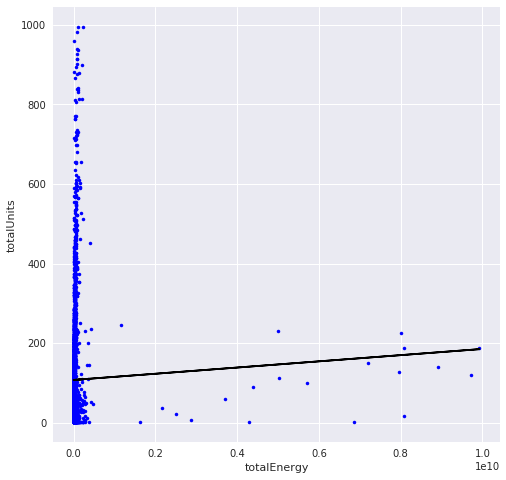

In [48]:
pl.figure(figsize=(8,8))
pl.plot(bblnrgdataCut['totalEnergy'] , bblnrgdataCut['UnitsTotal'] , 'b.')
pl.plot(bblnrgdataCut['totalEnergy'] , OLS3.predict(bblnrgdataCut) , 'k')
pl.xlabel('totalEnergy')
pl.ylabel('totalUnits')

### Figure 8: Plot showing the total number of units in the building against the total energy consumed. A linear model has been fitted to the plot  which does not capture all the values signifying a poor fit.

In [49]:
OLS4 = smf.ols(formula='totalEnergy ~ UnitsTotal' , data =bblnrgdataCut).fit()
OLS4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalEnergy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.028
Date:                Tue, 27 Nov 2018   Prob (F-statistic):             0.0819
Time:                        23:38:00   Log-Likelihood:                -98282.
No. Observations:                4624   AIC:                         1.966e+05
Df Residuals:                    4622   BIC:                         1.966e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.383e+07      8e+06      4.232      0.000      1.82e+07  4.95e+07
UnitsTotal  8.407e+04   4.83e+04      1.740      0.082     -1.06e+04  1.79e+05
==============================================================================
Omnibus:                     9770.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25757552.870
Skew:                          18.508   Prob(JB):                         0.00
Kurtosis:                     366.758   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'totalUnits')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


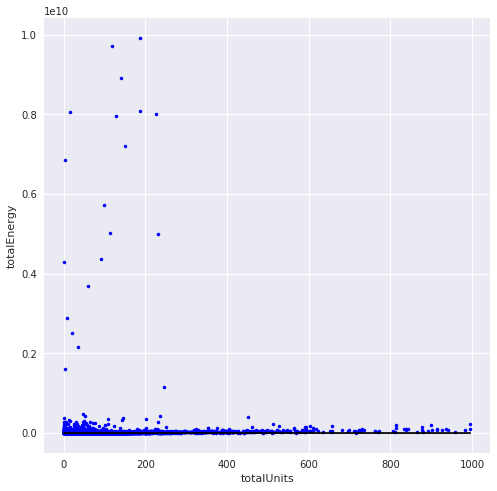

In [50]:
pl.figure(figsize=(8,8))
pl.plot(bblnrgdataCut['UnitsTotal'] , bblnrgdataCut['totalEnergy'] , 'b.')
pl.plot(bblnrgdataCut['UnitsTotal'] , OLS3.predict(bblnrgdataCut) , 'k')
pl.ylabel('totalEnergy')
pl.xlabel('totalUnits')

### Figure 9: Plot showing the total number of units in the building against the total energy consumed. A linear model has been fitted which appears to capture most of the data points.

In [51]:
bblnrgdataCut['logUnits102'] = bblnrgdataCut['logUnits10']**2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
bblnrgdataCut.sort_values(by='logUnits10' , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
OLS6 = smf.ols(formula='logEnergy10 ~ logUnits10 + I(logUnits102)',data=bblnrgdataCut).fit()
OLS6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logEnergy10   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     574.1
Date:                Tue, 27 Nov 2018   Prob (F-statistic):          2.06e-223
Time:                        23:38:03   Log-Likelihood:                -2470.3
No. Observations:                4624   AIC:                             4947.
Df Residuals:                    4621   BIC:                             4966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          7.6469      0.040    189.005      0.000         7.568     7.726
logUnits10        -1.1852      0.050    -23.891      0.000        -1.283    -1.088
I(logUnits102)     0.4350      0.015     28.903      0.000         0.405     0.464
==============================================================================
Omnibus:                     1436.558   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24336.372
Skew:                           1.032   Prob(JB):                         0.00
Kurtosis:                      14.048   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'logEnergy')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


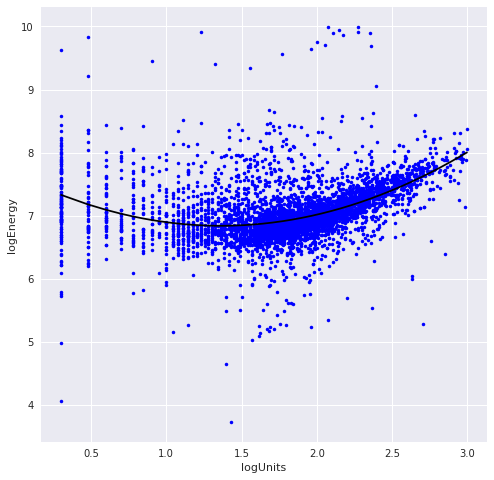

In [54]:
pl.figure(figsize=(8,8))
pl.plot(bblnrgdataCut['logUnits10'].sort_values() , bblnrgdataCut['logEnergy10'] , 'b.')

pl.plot(bblnrgdataCut['logUnits10'].sort_values(), OLS6.predict(bblnrgdataCut) , 'k' )
pl.xlabel('logUnits')
pl.ylabel('logEnergy')

### Figure 9: Plot showing the total energy consumed against the total number of units in the building. A polynomial model has been fitted which appears to capture most of the data points and fit well to the data

In [55]:
def chi2(data, model, errors=None):
    
    """
    Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    """
    
    if errors is not None:
        chi2_statistic = np.sum(((data - model) **2)/errors **2)
    
    
    
    else:
        chi2_statistic = np.sum(((data - model) **2))
    
    return chi2_statistic
                

In [56]:
bblnrgdataCut['logUnits10_errors'] = np.sqrt(bblnrgdataCut.UnitsTotal)/(bblnrgdataCut.UnitsTotal * np.log(10))
bblnrgdataCut['logEnergy10_errors2'] = np.sqrt(bblnrgdataCut.totalEnergy)/(bblnrgdataCut.totalEnergy * np.log(10))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [57]:
#calculate the error of logEnergy ---> wrong ; go and checkk during office hours
component_1 = bblnrgdataCut['logUnits10_errors']

component_2 = 2 * bblnrgdataCut['logUnits10'].values  * bblnrgdataCut['logUnits10_errors']
total_error = np.sqrt(bblnrgdataCut['logUnits10_errors'] **2)


bblnrgdataCut['logEnergy10_errors'] = total_error

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,0.98,'Total units in building as function of Energy')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


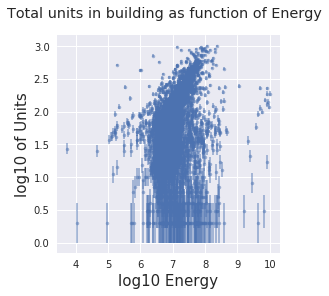

In [58]:
import matplotlib.pyplot as plt
ax1 = plt.subplots(figsize=(4,4))
matplotlib.pyplot.errorbar(bblnrgdataCut.logEnergy10, bblnrgdataCut.logUnits10, 
            yerr=bblnrgdataCut.logUnits10_errors, fmt='.',
            alpha=0.5)
plt.ylabel("log10 of Units", fontsize=15)
plt.xlabel("log10 Energy", fontsize=15)
pl.suptitle("Total units in building as function of Energy")


### Figure 9: Plot showing the total number of units in the building against the total energy consumed in a logarithmic scale with the error bars of the the logUnits

Text(0.5,0.98,'Total units in building as function of Energy')

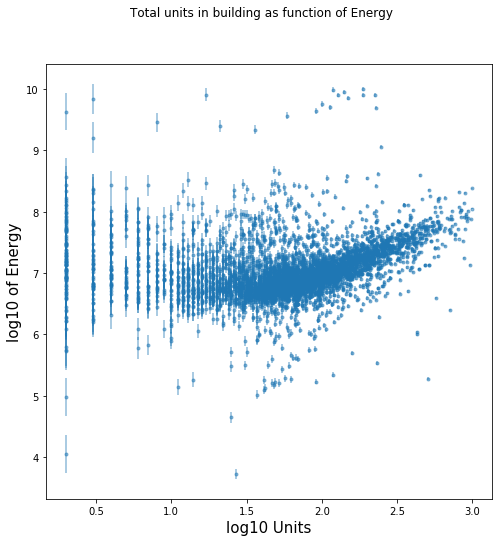

In [59]:
sns.reset_orig()
import matplotlib.pyplot as plt
ax1 = plt.subplots(figsize=(8,8))
matplotlib.pyplot.errorbar(bblnrgdataCut.logUnits10, bblnrgdataCut.logEnergy10, 
             yerr=bblnrgdataCut.logEnergy10_errors, fmt='.',
            alpha=0.5)
plt.ylabel("log10 of Energy", fontsize=15)
plt.xlabel("log10 Units", fontsize=15)
pl.suptitle("Total units in building as function of Energy")


### Figure 10: Plot showing  the total energy consumed against the total number of units in the building in a logarithmic scale with the error bars of the the logEnergy units.

Text(0.5,0.98,'Total units in building as function of Energy')

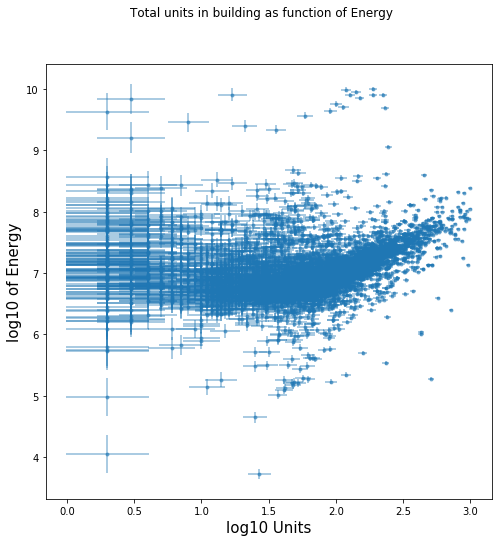

In [60]:
ax1 = plt.subplots(figsize=(8,8))
matplotlib.pyplot.errorbar(bblnrgdataCut.logUnits10, bblnrgdataCut.logEnergy10, 
            xerr=bblnrgdataCut.logUnits10_errors ,              
            yerr=bblnrgdataCut.logEnergy10_errors, fmt='.',
            alpha=0.5)
plt.ylabel("log10 of Energy", fontsize=15)
plt.xlabel("log10 Units", fontsize=15)
pl.suptitle("Total units in building as function of Energy")

### Figure 11: Plot showing the total energy consumed against the total number of units in the building in a logarithmic scale with the error bars of the the logEnergy units and the logUnits.

In [61]:
dof = bblnrgdataCut.shape[0] - OLS6.params.count()
print ("degrees of freedom:" , dof)

degrees of freedom: 4621


In [62]:
print ("Units vs Energy residuals (no errors include): %.2f"%\
       (chi2(bblnrgdataCut.logUnits10, OLS2.predict()) / 
        float(dof)))

Units vs Energy residuals (no errors include): 5.69


In [63]:
print ("Units vs Energy chi square per DOF w independent variable error only: %.2f"%\
       (chi2(bblnrgdataCut.logUnits10, OLS2.predict(), errors = bblnrgdataCut.logEnergy10_errors) / dof))

Units vs Energy chi square per DOF w independent variable error only: 2349.50


In [64]:
print ("Units vs Energy chi square per DOF w independent variable error only: %.2f"%\
       (chi2(bblnrgdataCut.logUnits10, OLS2.predict(), errors = np.sqrt(bblnrgdataCut.logEnergy10_errors**2 + 
                             bblnrgdataCut.logUnits10_errors**2)) / dof))

Units vs Energy chi square per DOF w independent variable error only: 1174.75


In [65]:
print ("Energy vs Units residuals (no errors include): %.2f"%\
       (chi2(bblnrgdataCut.logEnergy10, OLS1.predict()) / dof))

print ("Energy vs Units chi square per DOF w independent variable error only: %.2f"%\
       (chi2(bblnrgdataCut.logEnergy10, OLS1.predict(), 
            errors = bblnrgdataCut.logUnits10_errors) / dof))

print ("Energy vs Units chi square per DOF : %.2f"%\
       (chi2(bblnrgdataCut.logEnergy10, OLS1.predict(), 
            errors = np.sqrt(bblnrgdataCut.logEnergy10_errors**2 + 
                             bblnrgdataCut.logUnits10_errors**2))  / dof))


Energy vs Units residuals (no errors include): 84.22
Energy vs Units chi square per DOF w independent variable error only: 48243.18
Energy vs Units chi square per DOF : 24121.59


### Lesser the chi square , better is our model. The units vs Energy model has a lower chi square value than the enrgy vs units

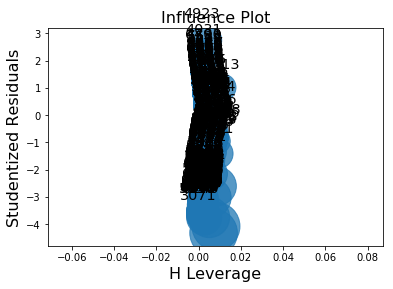

In [66]:
sm.graphics.influence_plot(OLS2, alpha  = 0.05, criterion="cooks");

### Figure 12: Influence plot of the logUnits ~ logEnergy

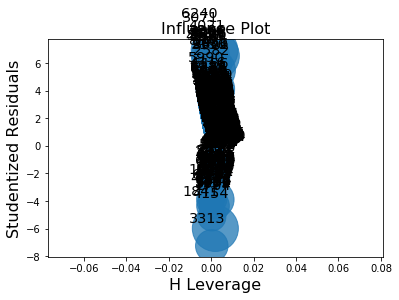

In [67]:
sm.graphics.influence_plot(OLS1, alpha  = 0.05, criterion="cooks");

### Figure 13: Influence plot of the logEnergy ~ logUnits

### Interpretation:

The energy vs units has a higher spread and density (influence) thatn the units vs energy which means fig 13 formulation of independent and dependent variables has a higher predictive power.

Comparing the linear and curve fit with Likelihood Ratio LR test; we require a significance $\alpha=0.05$
The curve fit and linear fit od the Energy vs Units can be compared with LR test because they are nested models
The difference in the number of degrees of freedom is 1, so the LR statistics will follow a $\chi^2$ distribution with 1 DOF.

In [68]:
result = OLS6.compare_lr_test(OLS1)

In [69]:
if result[1] < 0.05:
    print('Reject the null hypothesis that the restricted model is the better model')
else:
    print('Fail to reject the null hypothesis that the restricted model is the better model')


Reject the null hypothesis that the restricted model is the better model


In [70]:
likelihood = np.zeros([2,50])


In [71]:
likelihood = []  
for i in range(50):
    inner_likelihood_values_cal = []
    for j in range(50):
          inner_likelihood_values_cal.append((OLS6.predict()[i] - bblnrgdataCut.logEnergy10.iloc[j]) ** 2)
    likelihood.append(inner_likelihood_values_cal)

In [72]:
likelihood_np_array = np.array(likelihood)

In [73]:
likelihood_e = []  
for i in range(50):
    level1 = []
    for j in range(50):
          level1.append((OLS6.predict()[i] - bblnrgdataCut.logEnergy10.iloc[j]) ** 2/bblnrgdataCut['logEnergy10_errors2'].iloc[i] )
    likelihood_e.append(level1)

In [74]:
lle = np.array(likelihood_e)

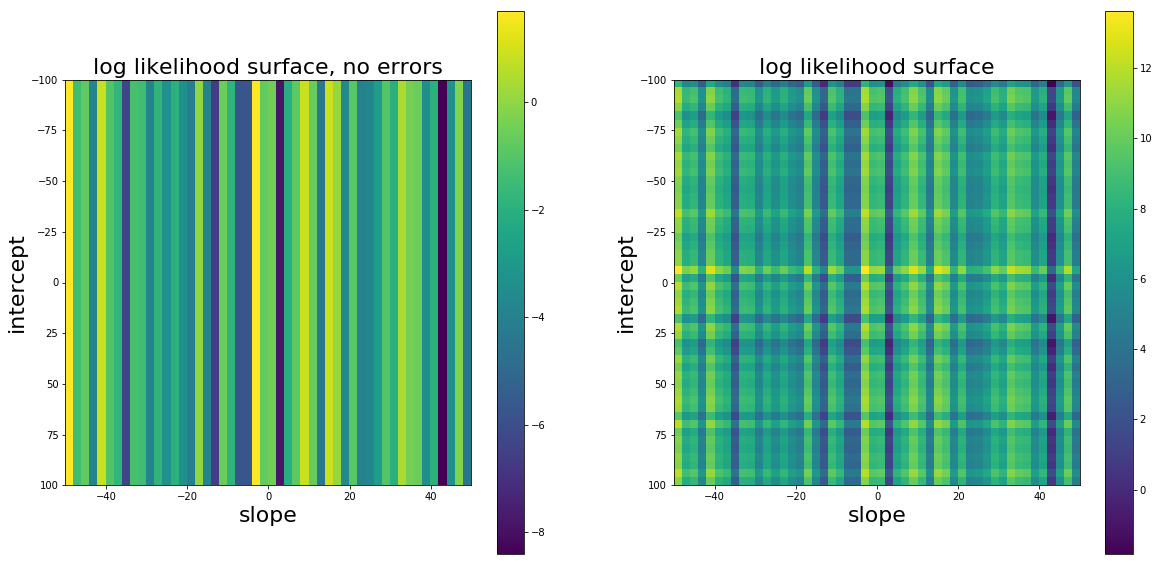

In [75]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.set_title ("log likelihood surface, no errors", fontsize = 22)
pl.imshow(np.log(likelihood_np_array),extent = [-50,50,100,-100], aspect=0.5)
ax1.set_xlabel('slope', fontsize = 22)
ax1.set_ylabel('intercept', fontsize = 22)
pl.colorbar()


ax2 = fig.add_subplot(122)
ax2.set_title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(lle), extent = [-50,50,100,-100], aspect=0.5)
ax2.set_xlabel('slope', fontsize = 22)
ax2.set_ylabel('intercept', fontsize = 22)
pl.colorbar();

### Figure 14: Surface plot of the chi square values with and without their erros. A minimum value is represend in the darker shade

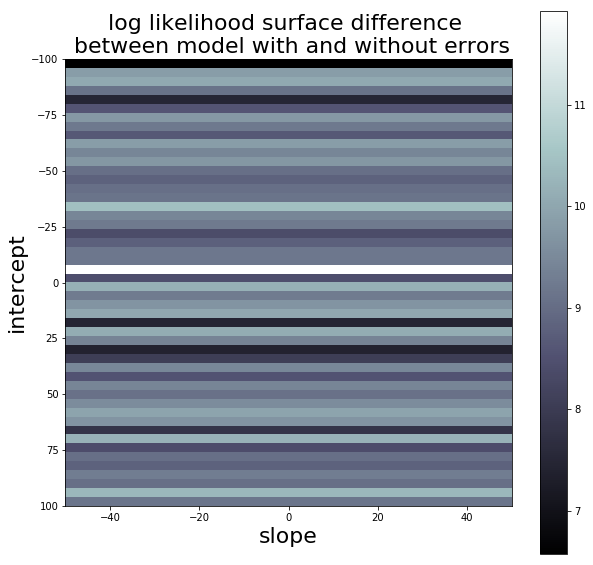

In [77]:
ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
ax1.set_title ("log likelihood surface difference \n between model with and without errors", fontsize = 22)
pl.imshow(np.abs(np.log(likelihood_np_array ) - np.log(lle)), extent = [-50,50,100,-100], aspect=0.5, cmap='bone')
ax1.set_xlabel('slope', fontsize = 22)
ax1.set_ylabel('intercept', fontsize = 22)
pl.colorbar();